# **AULA 2 - Média, mediana e visualização de dados (continuação Aula 1)**

## Aula 1 - Python e Pandas

- Importando Bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Coletando os dados

Dados dos filmes

In [3]:
url = 'https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv'
movie = pd.read_csv(url)

In [4]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Dados das classificações dos filmes

In [5]:
url1 = 'https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true'
rating = pd.read_csv(url1)

In [6]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


- Analisando a estrutura dos dataset

In [7]:
movie.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [8]:
movie.shape

(9742, 3)

In [9]:
len(movie)

9742

In [10]:
type(movie)

pandas.core.frame.DataFrame

In [11]:
rating.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [12]:
rating.shape

(100836, 4)

In [13]:
len(rating)

100836

In [14]:
type(rating)

pandas.core.frame.DataFrame

- Editando as colunas dos datasets

In [15]:
movie.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [16]:
movie.columns = ['MovieID', 'Title','Genres']

In [17]:
movie.columns

Index(['MovieID', 'Title', 'Genres'], dtype='object')

In [18]:
rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [19]:
rating.columns = ['UserID','MovieID','Rating','Momento']

In [20]:
rating.columns

Index(['UserID', 'MovieID', 'Rating', 'Momento'], dtype='object')

- Analisando os dados apenas do filme 1

In [21]:
movie_1 = rating.query('MovieID == 1')
movie_1.head()

,UserID,MovieID,Rating,Momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [22]:
movie_1.describe()

,UserID,MovieID,Rating,Momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


Vendo apenas a media dos dados do dataset

In [23]:
movie_1.mean()

UserID     3.065302e+02
MovieID    1.000000e+00
Rating     3.920930e+00
Momento    1.129835e+09
dtype: float64

- Coletando apenas as notas dos filmes

In [24]:
rating['Rating']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: Rating, Length: 100836, dtype: float64

In [25]:
rating['Rating'].mean()

3.501556983616962

- Encontrando a media de todos os filmes do dataset 

In [26]:
movie_mean_rating = rating.groupby('MovieID')['Rating'].mean()
movie_mean_rating

MovieID
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: Rating, Length: 9724, dtype: float64

- Adicionando a media das notas dos filmes na base de dados original

In [27]:
type(movie)

pandas.core.frame.DataFrame

In [28]:
type(movie_mean_rating)

pandas.core.series.Series

Para garantir que a nota média da coluna nova criada seja a nota do seu respectivo filme, vamos utilizar o metodo join() e criar um novo dataset

In [29]:
movie_mean = movie.join(movie_mean_rating, on="MovieID")
movie_mean.head()

,MovieID,Title,Genres,Rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


Ordenando em ordem decrescente de notas o dataset criado

In [30]:
movie_mean = movie_mean.sort_values("Rating", ascending=False)
movie_mean.head()

,MovieID,Title,Genres,Rating
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0


- Criando graficos para análise

Histograma do filme Toy Story

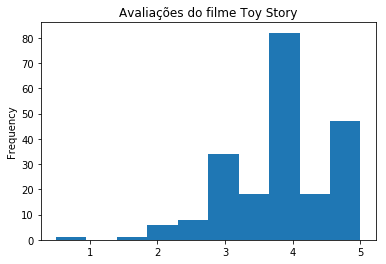

In [31]:
rating.query("MovieID == 1")["Rating"].plot(kind='hist')
plt.title("Avaliações do filme Toy Story")
plt.show()

Histograma do filme Jumanji

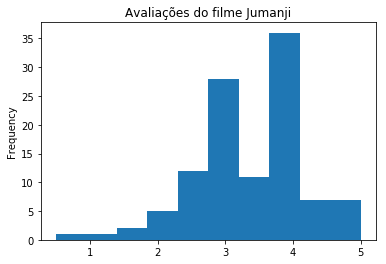

In [32]:
rating.query("MovieID == 2 ")["Rating"].plot(kind='hist')
plt.title("Avaliações do filme Jumanji")
plt.show()

Histograma da animação Liga da Justiça: Doom

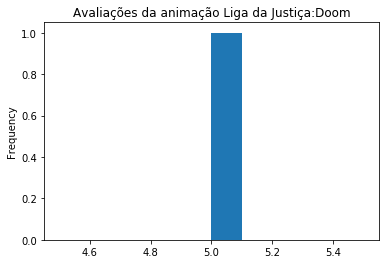

In [33]:
rating.query("MovieID == 102084")["Rating"].plot(kind='hist')
plt.title("Avaliações da animação Liga da Justiça:Doom")
plt.show()

Dado esse cenário a primeira coisa que me chama a atenção é a animação da liga da justiça ter média de nota igual a 5. Ao analisar o histograma do respectivo filme, verificamos que ele só teve uma avaliação igual a 5, logo, fica evidente que a **quantidade de votos é um aspecto importante na avaliação das médias**. Com apenas uma avaliação, não conseguimos garantir que o filme é realmente bom, tornando a avaliação muito "volátil". Imagina que Liga da Justiça receba mais uma avaliação, com nota 0, assim a média seria 2.5. Apenas com mais essa avaliação o filme passaria a ser considerada um "pior" que Jumanji e Toy Story.

Outro ponto interessante é comparar o histograma de Toy Story e Jumanji, ambos tem médias "relativamente próximas". Mas repare que a distribuição de notas são diferentes, Toy Story recebe mais notas 5 e 4 que qualquer outra nota, enquanto Jumanji recebe mais notas 4 e 3, assim concluímos que a **distribuição das notas também é um fator importante na avaliação das médias**

## Desafio 1

- Determine quantos filmes não tem avaliações e quais são esses filmes.

Verificando se existe valores nulos e quantos no dataset

In [34]:
movie_null = movie_mean.query("Rating != Rating")

In [35]:
movie_null['Title']

816                            Innocents, The (1961)
2211                                  Niagara (1953)
2499                          For All Mankind (1989)
2587    Color of Paradise, The (Rang-e khoda) (1999)
3118                  I Know Where I'm Going! (1945)
4037                              Chosen, The (1981)
4506     Road Home, The (Wo de fu qin mu qin) (1999)
4598                                  Scrooge (1970)
4704                                    Proof (1991)
5020                       Parallax View, The (1974)
5293                        This Gun for Hire (1942)
5421                    Roaring Twenties, The (1939)
5452                     Mutiny on the Bounty (1962)
5749              In the Realms of the Unreal (2004)
5824                        Twentieth Century (1934)
5837                       Call Northside 777 (1948)
5957                    Browning Version, The (1951)
7565                              Chalet Girl (2011)
Name: Title, dtype: object

## Desafio 2

- Mudar o nome da coluna nota do dataframe **movie_mean** para mean após o join.

In [36]:
movie_mean

,MovieID,Title,Genres,Rating
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


In [37]:
movie_mean = movie_mean.rename(columns = {'Rating': 'Mean'})


In [38]:
movie_mean.head()

,MovieID,Title,Genres,Mean
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0


## Desafio 3

- Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [39]:
total_rating_movie = rating.groupby('MovieID')['Rating'].count()
total_rating_movie.head()

MovieID
1    215
2    110
3     52
4      7
5     49
Name: Rating, dtype: int64

Adicionando a Serie com o quantidade total de votos no dataset original

In [40]:
movie_mean_total = movie_mean.join(total_rating_movie, on='MovieID')
movie_mean_total= movie_mean_total.rename(columns={'Rating': 'Count Rating'})
movie_mean_total.head()

,MovieID,Title,Genres,Mean,Count Rating
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0,1.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0,1.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0,1.0
9094,143511,Human (2015),Documentary,5.0,1.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0,1.0


## Desafio 4

- Arredondar as médias (coluna de nota média) para duas casas decimais.

In [41]:
movie_mean_total['Mean'] = movie_mean_total['Mean'].round(2)
movie_mean_total

,MovieID,Title,Genres,Mean,Count Rating
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0,1.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0,1.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0,1.0
9094,143511,Human (2015),Documentary,5.0,1.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0,1.0
...,...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN,NaN


## Desafio 5

- Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [42]:
genre = movie_mean_total.Genres.str.get_dummies('|')
generos = genre.columns.to_list()
generos

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

## Desafio 6

- Contar o número de aparições de cada genero.

In [43]:
movie_genre = movie_mean_total.Genres.str.get_dummies().sum()
movie_genre

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

## Desafio 7

- Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

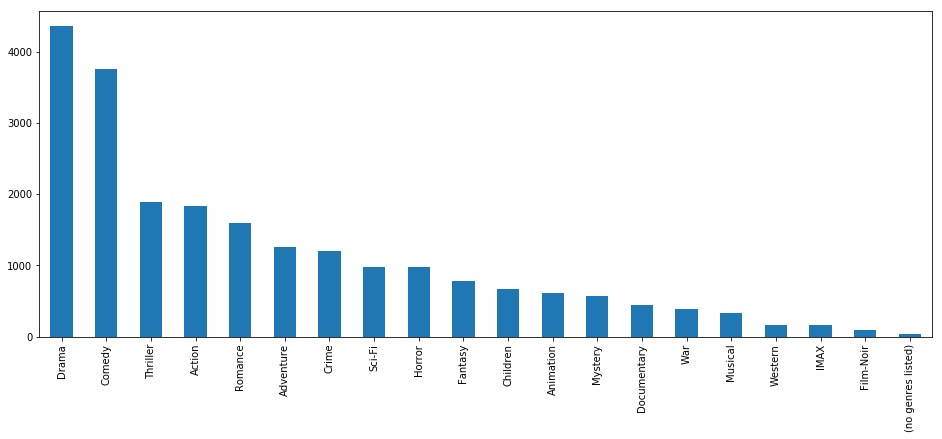

In [44]:
movie_genre.sort_values(ascending=False).plot(kind='bar', figsize=(16, 6))

# AULA 2 - Média, mediana e visualização de graficos

In [45]:
movie_mean.head()

,MovieID,Title,Genres,Mean
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0


- Definindo uma função para plotar graficos

In [46]:
def plot_movie(n):
    rating_movie = rating.query(f"MovieID == {n}")["Rating"]
    rating_movie.plot(kind='hist')
    return rating_movie.describe()

Plotando grafico do filme Mágico de OZ

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: Rating, dtype: float64

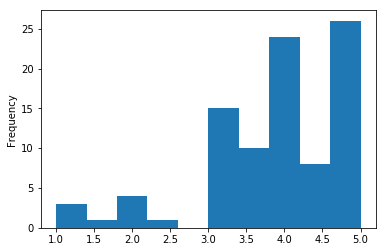

In [47]:
plot_movie(919)

Plotando o grafico do filme Little Miss Sunshine

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: Rating, dtype: float64

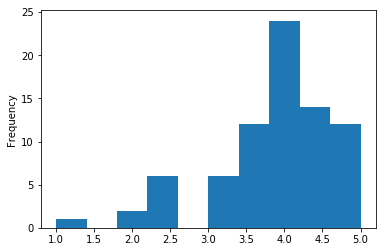

In [48]:
plot_movie(46578)

- Adicionando a criação de um grafico de BoxPlot na função

In [49]:
def plot_movie(n):
    rating_movie = rating.query(f"MovieID == {n}")["Rating"]
    rating_movie.plot(kind='hist')
    plt.show()
    print('\n')
    rating_movie.plot.box()
    plt.show()
    return rating_movie.describe()

Plotando grafico do filme Mágico de OZ

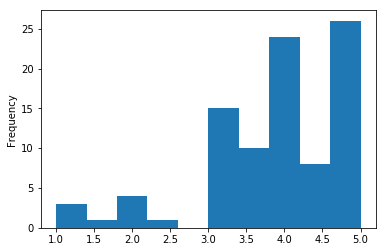

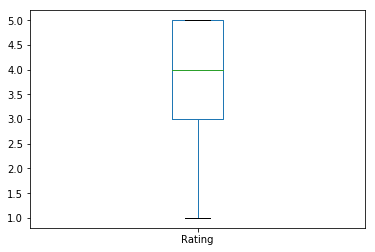

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: Rating, dtype: float64

In [50]:
plot_movie(919)

Plotando o grafico do filme Little Miss Sunshine

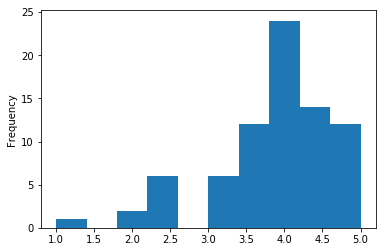

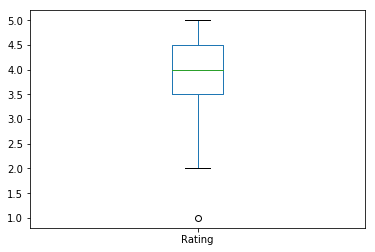

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: Rating, dtype: float64

In [51]:
plot_movie(46578)

- Unindo os graficos de boxplot em apenas um

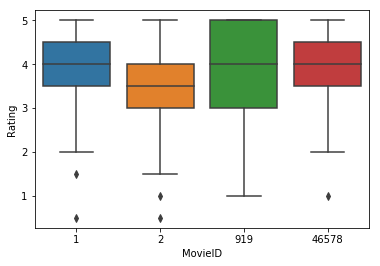

In [52]:
sns.boxplot(data = rating.query("MovieID in [1,2,919,46578]"), x ="MovieID", y="Rating")

Os parametros dodos é um dataframe das notas dos filmes com Toy Story, Jumanju, Magico de Oz e Little Miss Sunshine

## Desafio 1

- Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

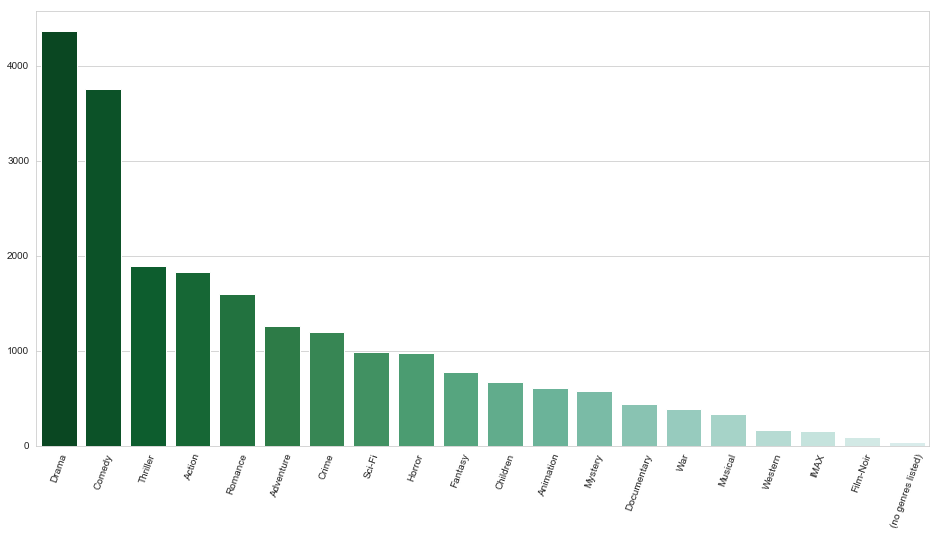

In [53]:
import seaborn as sns
sns.set_style("whitegrid")

movie_genre = movie["Genres"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x= movie_genre.index,
            y= movie_genre.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(movie_genre) + 4))
plt.xticks(rotation=70)
plt.show()

## Desafio 2

- Encontar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.

In [59]:
movie_mean.sample(10)

,MovieID,Title,Genres,Mean
4454,6577,Kickboxer 2: The Road Back (1991),Action|Drama,3.500000
8769,128838,Crimson Peak (2015),Horror,3.500000
3593,4927,"Last Wave, The (1977)",Fantasy|Mystery|Thriller,3.000000
5840,32440,If Looks Could Kill (1991),Action|Comedy,2.000000
9484,169982,Power Rangers (2017),Action|Adventure|Sci-Fi,3.000000
1337,1810,Primary Colors (1998),Comedy|Drama,3.500000
5486,26313,California Split (1974),Comedy|Drama,4.000000
5685,27728,Ghost in the Shell 2: Innocence (a.k.a. Innoce...,Action|Animation|Drama|Sci-Fi|Thriller,2.166667
8207,103483,V/H/S/2 (2013),Horror|Thriller,4.500000
956,1257,Better Off Dead... (1985),Comedy|Romance,3.685185


Os filmes Kickboxer 2: The Road Back, Crimson Peak e Primary Colors, possuem a mesma media de notas. Vamos agora analisar a distribuição de cada um deles.

Histograma do filme Kickboxer 2: The Road Back

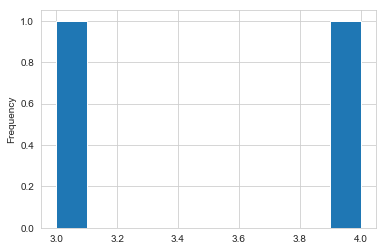

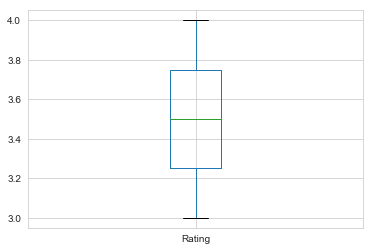

count    2.000000
mean     3.500000
std      0.707107
min      3.000000
25%      3.250000
50%      3.500000
75%      3.750000
max      4.000000
Name: Rating, dtype: float64

In [60]:
plot_movie(6577)

Histograma do filme Crimson Peak

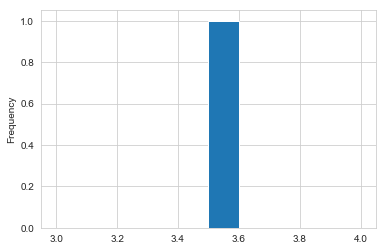

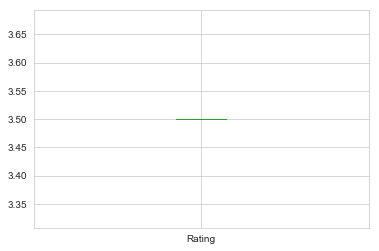

count    1.0
mean     3.5
std      NaN
min      3.5
25%      3.5
50%      3.5
75%      3.5
max      3.5
Name: Rating, dtype: float64

In [61]:
plot_movie(128838)

Histograma do filme Primary Colors

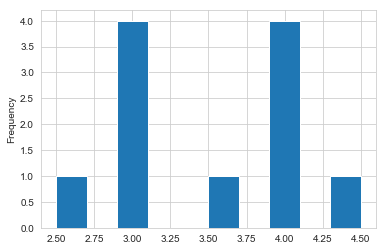

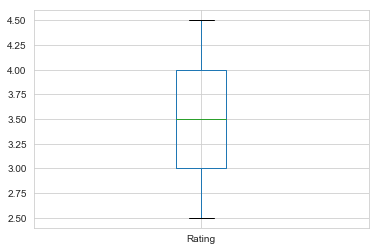

count    11.000000
mean      3.500000
std       0.632456
min       2.500000
25%       3.000000
50%       3.500000
75%       4.000000
max       4.500000
Name: Rating, dtype: float64

In [62]:
plot_movie(1810)

Os tres filmes escolhidos apesar de possuirem a mesma media de notas (3.5), eles possuem uma distribuição de quantidade de votos muito discrepante. Como o filme Kickboxer 2: The Road Black teve apenas dois votos, em quanto o filme Primary Color obteve 11 votos. Nota-se que os filmes possuem generos totalmente distintos, como o filme Kickboxer 2: The Road Black é do genero Ação | Drama, o filme Crimson Peak é do genero Horror e o filme Primary Color é Comedy | Drama.

## Desafio 3

- Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [66]:
movie_rating10 = movie_mean_total.sort_values('Count Rating', ascending = False).head(10)

In [67]:
movie_rating10

,MovieID,Title,Genres,Mean,Count Rating
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.16,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.43,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.20,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.16,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.19,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.23,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.75,238.0
97,110,Braveheart (1995),Action|Drama|War,4.03,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.97,224.0
461,527,Schindler's List (1993),Drama|War,4.22,220.0


In [69]:
title_movie_rating10 = movie_rating10['Title'].to_list()
id_movie_rating10 = movie_rating10['MovieID'].to_list()

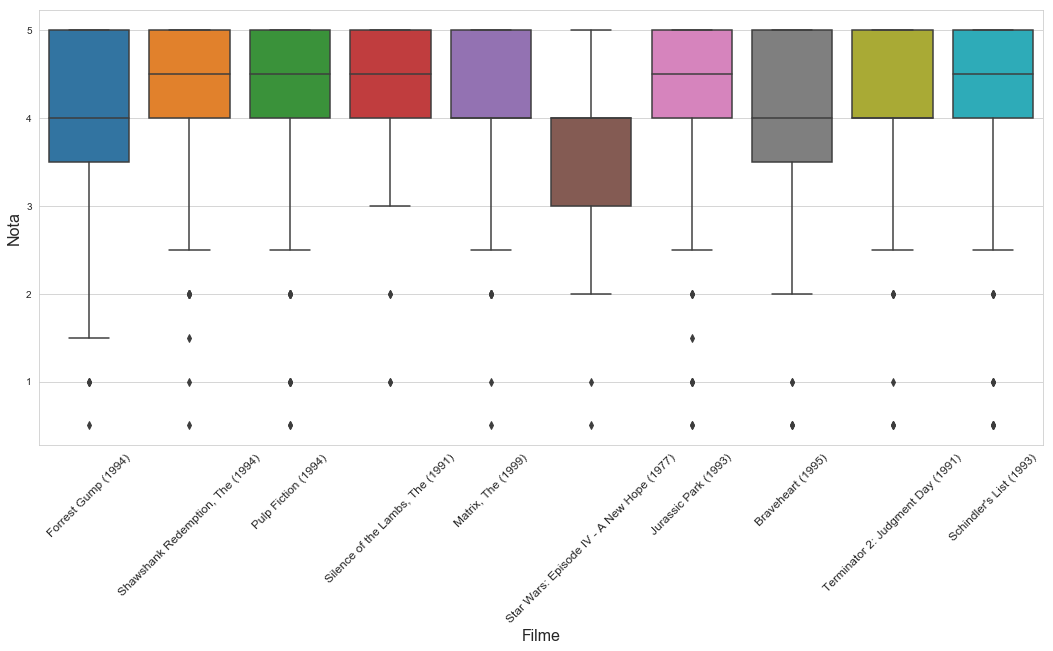

In [73]:
plt.figure(figsize = (18,8))
ax = sns.boxplot(x='MovieID', y='Rating', data= rating.query(f"MovieID in {id_movie_rating10}"))

ax.set_xticklabels(title_movie_rating10, fontsize=12)
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)
plt.xticks(rotation=45)

plt.show()

É possivel observar que em todos os filmes existem outliers, mas é importante notar que a distruibuição da maioria dos filmes é muito semelhante, com a nota minima por volta dos 2. A maioria fos boxplot são simetricos, o que revela que a mediana das notas esta bem centrada, revelando uma distribuição homogenea.

## Desafio 4

- Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

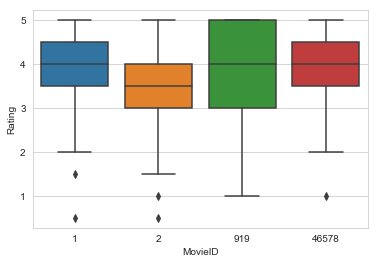

In [72]:
sns.boxplot(data = rating.query("MovieID in [1,2,919,46578]"), x ="MovieID", y="Rating")

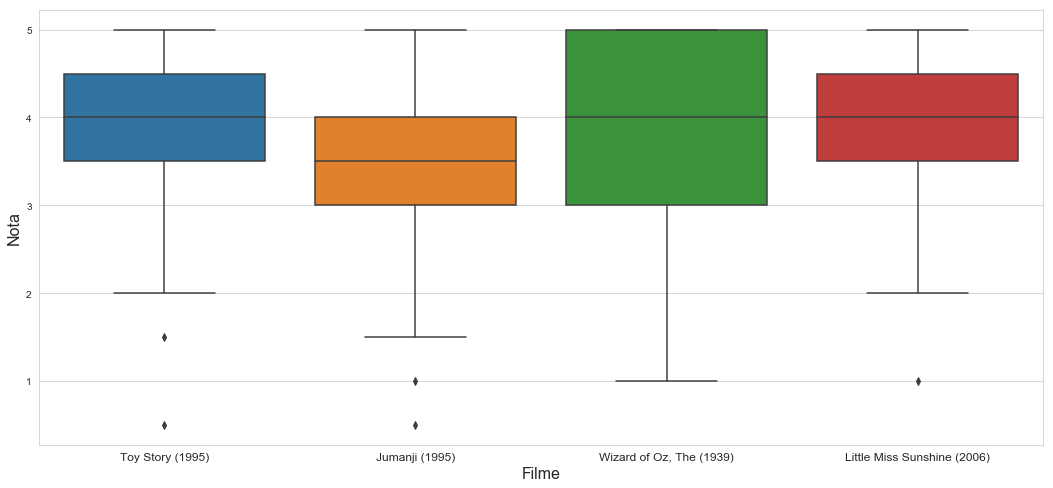

In [74]:
plt.figure(figsize = (18,8))
ax = sns.boxplot(data = rating.query("MovieID in [1,2,919,46578]"), x ="MovieID", y="Rating")

ax.set_xticklabels(movie.query("MovieID in [1,2,919,46578]")['Title'], fontsize=12)
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)

plt.show()

É possivel observar que a distribuição de notas do filme são bem diferentes.No entanto, todos apresentam um boxplot simetrico e com alguns outliers. Nota-se que o filme o Magico de Oz teve uma variação maior de notas comparada com os outros filmes.

## Desafio 5

- Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [88]:
def explora_filme(filme_id):
    filme = movie.query(f'MovieID == {filme_id}')
    notas = rating.query(f'MovieID == {filme_id}')['Rating']
    
    print(f'Filme: {filme.iloc[0, 1]}')
    print()
    
    print(f'Moda: {notas.mode().values}')    
    print(f'Média: {notas.mean()}')
    print(f'Mediana: {notas.median()}')

In [89]:
explora_filme(8387)

Filme: Police Academy: Mission to Moscow (1994)

Moda: [0.5]
Média: 0.8
Mediana: 0.5


In [90]:
explora_filme(89386)

Filme: Pearl Jam Twenty (2011)

Moda: [0.5]
Média: 0.5
Mediana: 0.5


In [91]:
explora_filme(3774)

Filme: House Party 2 (1991)

Moda: [0.5 1. ]
Média: 0.75
Mediana: 0.75


## Desafio 6

- Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

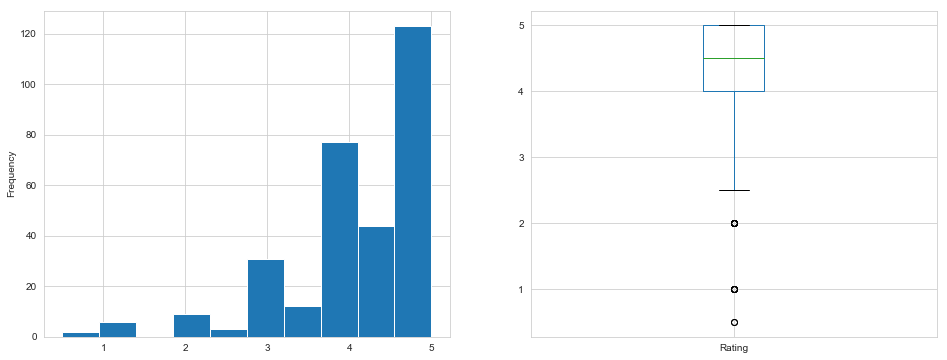

In [92]:
pulp_fiction = rating.query('MovieID == 296')['Rating']

f, axes = plt.subplots(1, 2, figsize=(16, 6))

pulp_fiction.plot(kind='hist', ax=axes[0])
pulp_fiction.plot(kind='box', ax=axes[1])

plt.show()

## Desafio 7

- Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [94]:
movie_year_mean = movie_mean.copy()
movie_year_mean['Year'] = movie_mean['Title'].str.extract("\((\d{4})\)")
movie_year_mean.head()

,MovieID,Title,Genres,Mean,Year
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0,2010
8107,100556,"Act of Killing, The (2012)",Documentary,5.0,2012
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0,2007
9094,143511,Human (2015),Documentary,5.0,2015
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0,2015


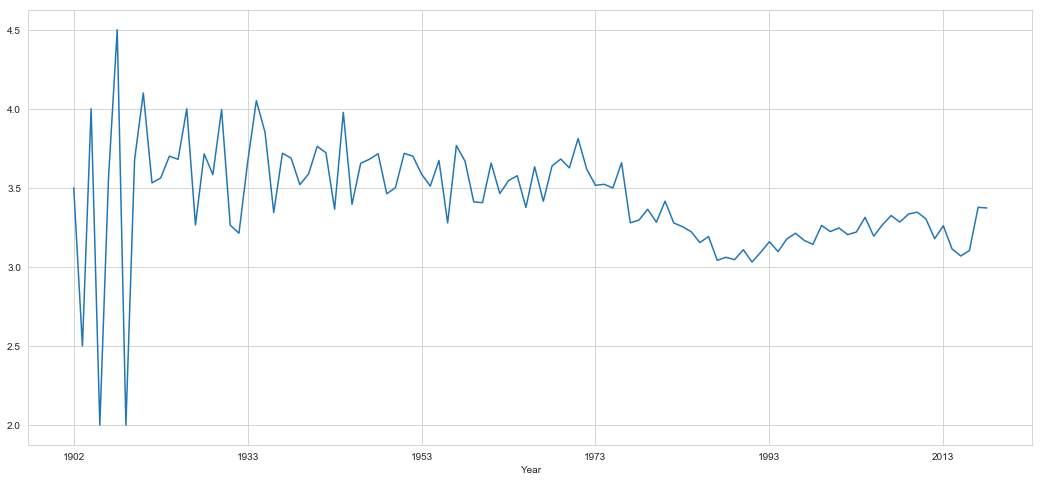

In [97]:
rating_mean_year = movie_year_mean.groupby('Year')['Mean'].mean()

plt.figure(figsize=(18, 8))
rating_mean_year.plot()